## **Day 27 of 30 days Data Analysis**

### ***Dashboard Refinement***

In [3]:
import pandas as pd

df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_clean_d08.csv")

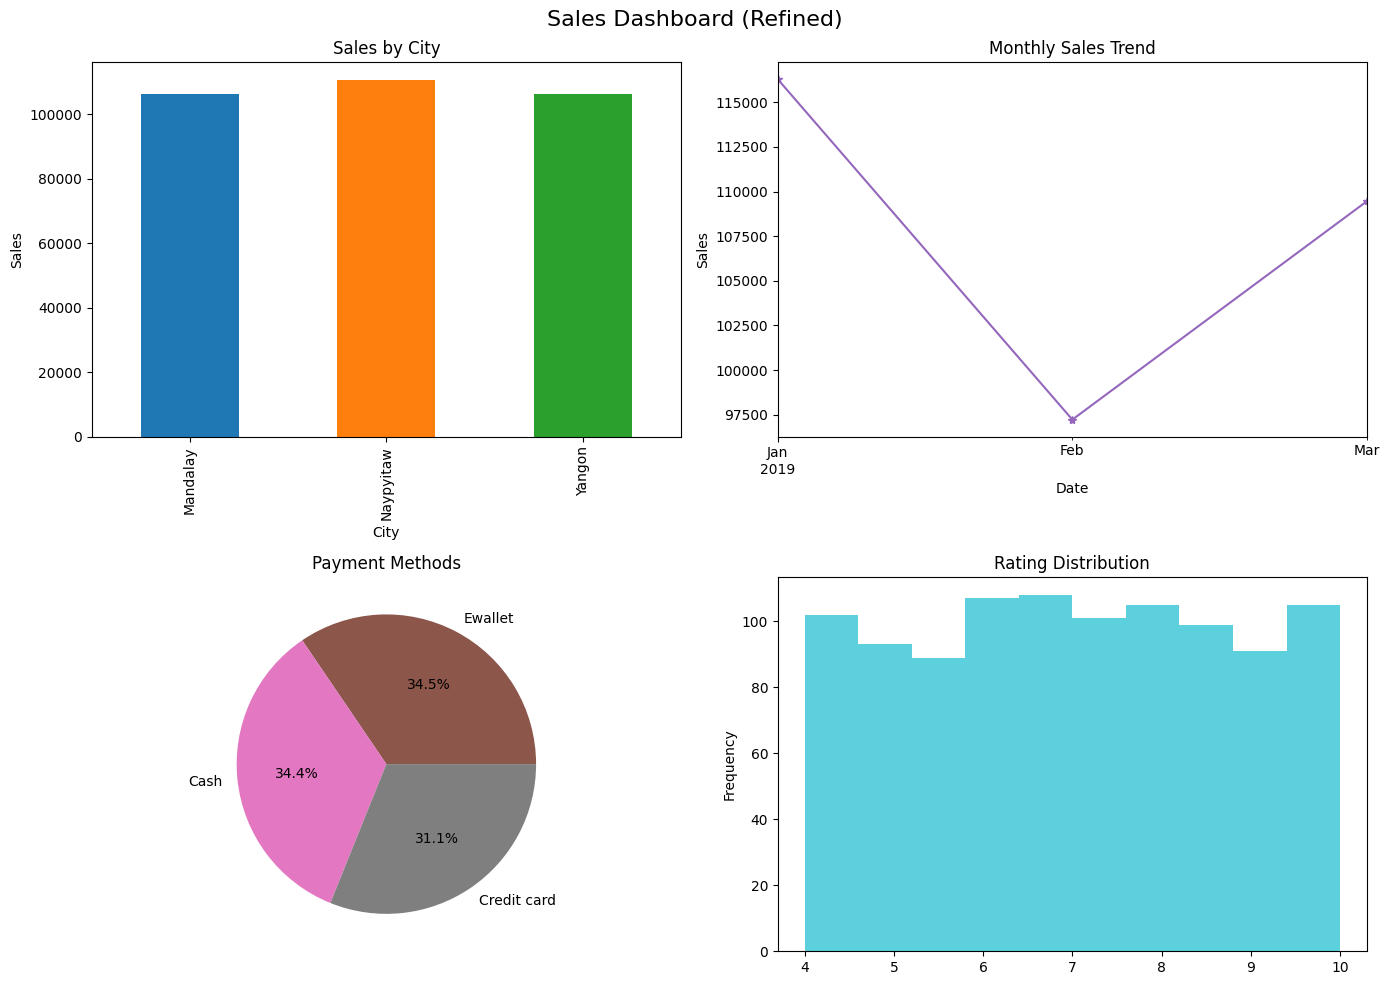

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define color palette
colors = {
    "city": ["#1f77b4", "#ff7f0e", "#2ca02c"],
    "month": "#9467bd",
    "payment": ["#8c564b", "#e377c2", "#7f7f7f"],
    "rating": "#17becf"
}

# KPI Titles
total_sales = df["Sales"].sum()
avg_rating = df["Rating"].mean()
gross_income = df["gross income"].sum()

fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Sales by City
city_sales = df.groupby("City")["Sales"].sum()
city_sales.plot(kind="bar", ax=axes[0,0], color=colors["city"])
axes[0,0].set_title("Sales by City")
axes[0,0].set_ylabel("Sales")

# Monthly Sales
if "Date" in df.columns and not np.issubdtype(df["Date"].dtype, np.datetime64):
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["MonthName"] = df["Date"].dt.month_name()
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Sales"].sum()
monthly_sales.plot(ax=axes[0,1], marker="*", color=colors["month"])
axes[0,1].set_title("Monthly Sales Trend")
axes[0,1].set_ylabel("Sales")

# Payment Distribution
payment_counts = df["Payment"].value_counts()
axes[1,0].pie(payment_counts.values, labels=payment_counts.index,
              autopct="%1.1f%%", colors=colors["payment"])
axes[1,0].set_title("Payment Methods")

# Rating Distribution
df["Rating"].plot(kind="hist", bins=10, ax=axes[1,1],
                  color=colors["rating"], alpha=0.7)
axes[1,1].set_title("Rating Distribution")

plt.suptitle("Sales Dashboard (Refined)", fontsize=16)
plt.tight_layout()
plt.savefig("dashboard_summary3.png", dpi=300)
plt.show()

# Save summary stats
summary = {
    "Total Sales": [total_sales],
    "Average Rating": [avg_rating],
    "Gross Income": [gross_income]
}
pd.DataFrame(summary).to_csv("dashboard_summary.csv", index=False)

### ***Day 27 — Dashboard Refinement***

***Objective***

*Polish the Day 26 dashboard for clarity and presentation quality.*

***Improvements***

*- Added consistent color palette for charts.*

*- Improved titles, axis labels, and legends.*

*- Clear 2×2 layout for City, Month, Payment, and Rating visualizations.*

*- Added KPI tiles: Total Sales, Average Rating, Gross Income.*

*- Exported refined dashboard as PNG and saved summary stats as CSV.*

***Outputs***

*- `week04_final/dashboard_summary3.png`*

*- `week04_final/dashboard_summary.csv`*